In [223]:
import pandas as pd 
import numpy as np

## Songs dataset

In [224]:
songs = pd.read_csv("data/spotify_songs.csv")

In [225]:
# Dropping the track_id column because it's an unreliable key 
songs = songs.drop(columns=["track_id"])

In [226]:
# Create column called track_key that is the song artist and song name merged together
songs["track_key"] = songs["track_name"].str.lower().str.strip() + " _ " + songs["track_artist"].str.lower().str.strip()

# Dropping duplicate artist-track name pairs 
songs = songs.drop_duplicates(subset=["track_key"])


### drop the 5 entries that didn't have song titles

In [227]:
nan_counts = songs.isna().sum()
# print(nan_counts)

In [228]:
songs.dropna(inplace=True)

In [229]:
songs.shape

(26159, 23)

### Plot the numerical column distributions

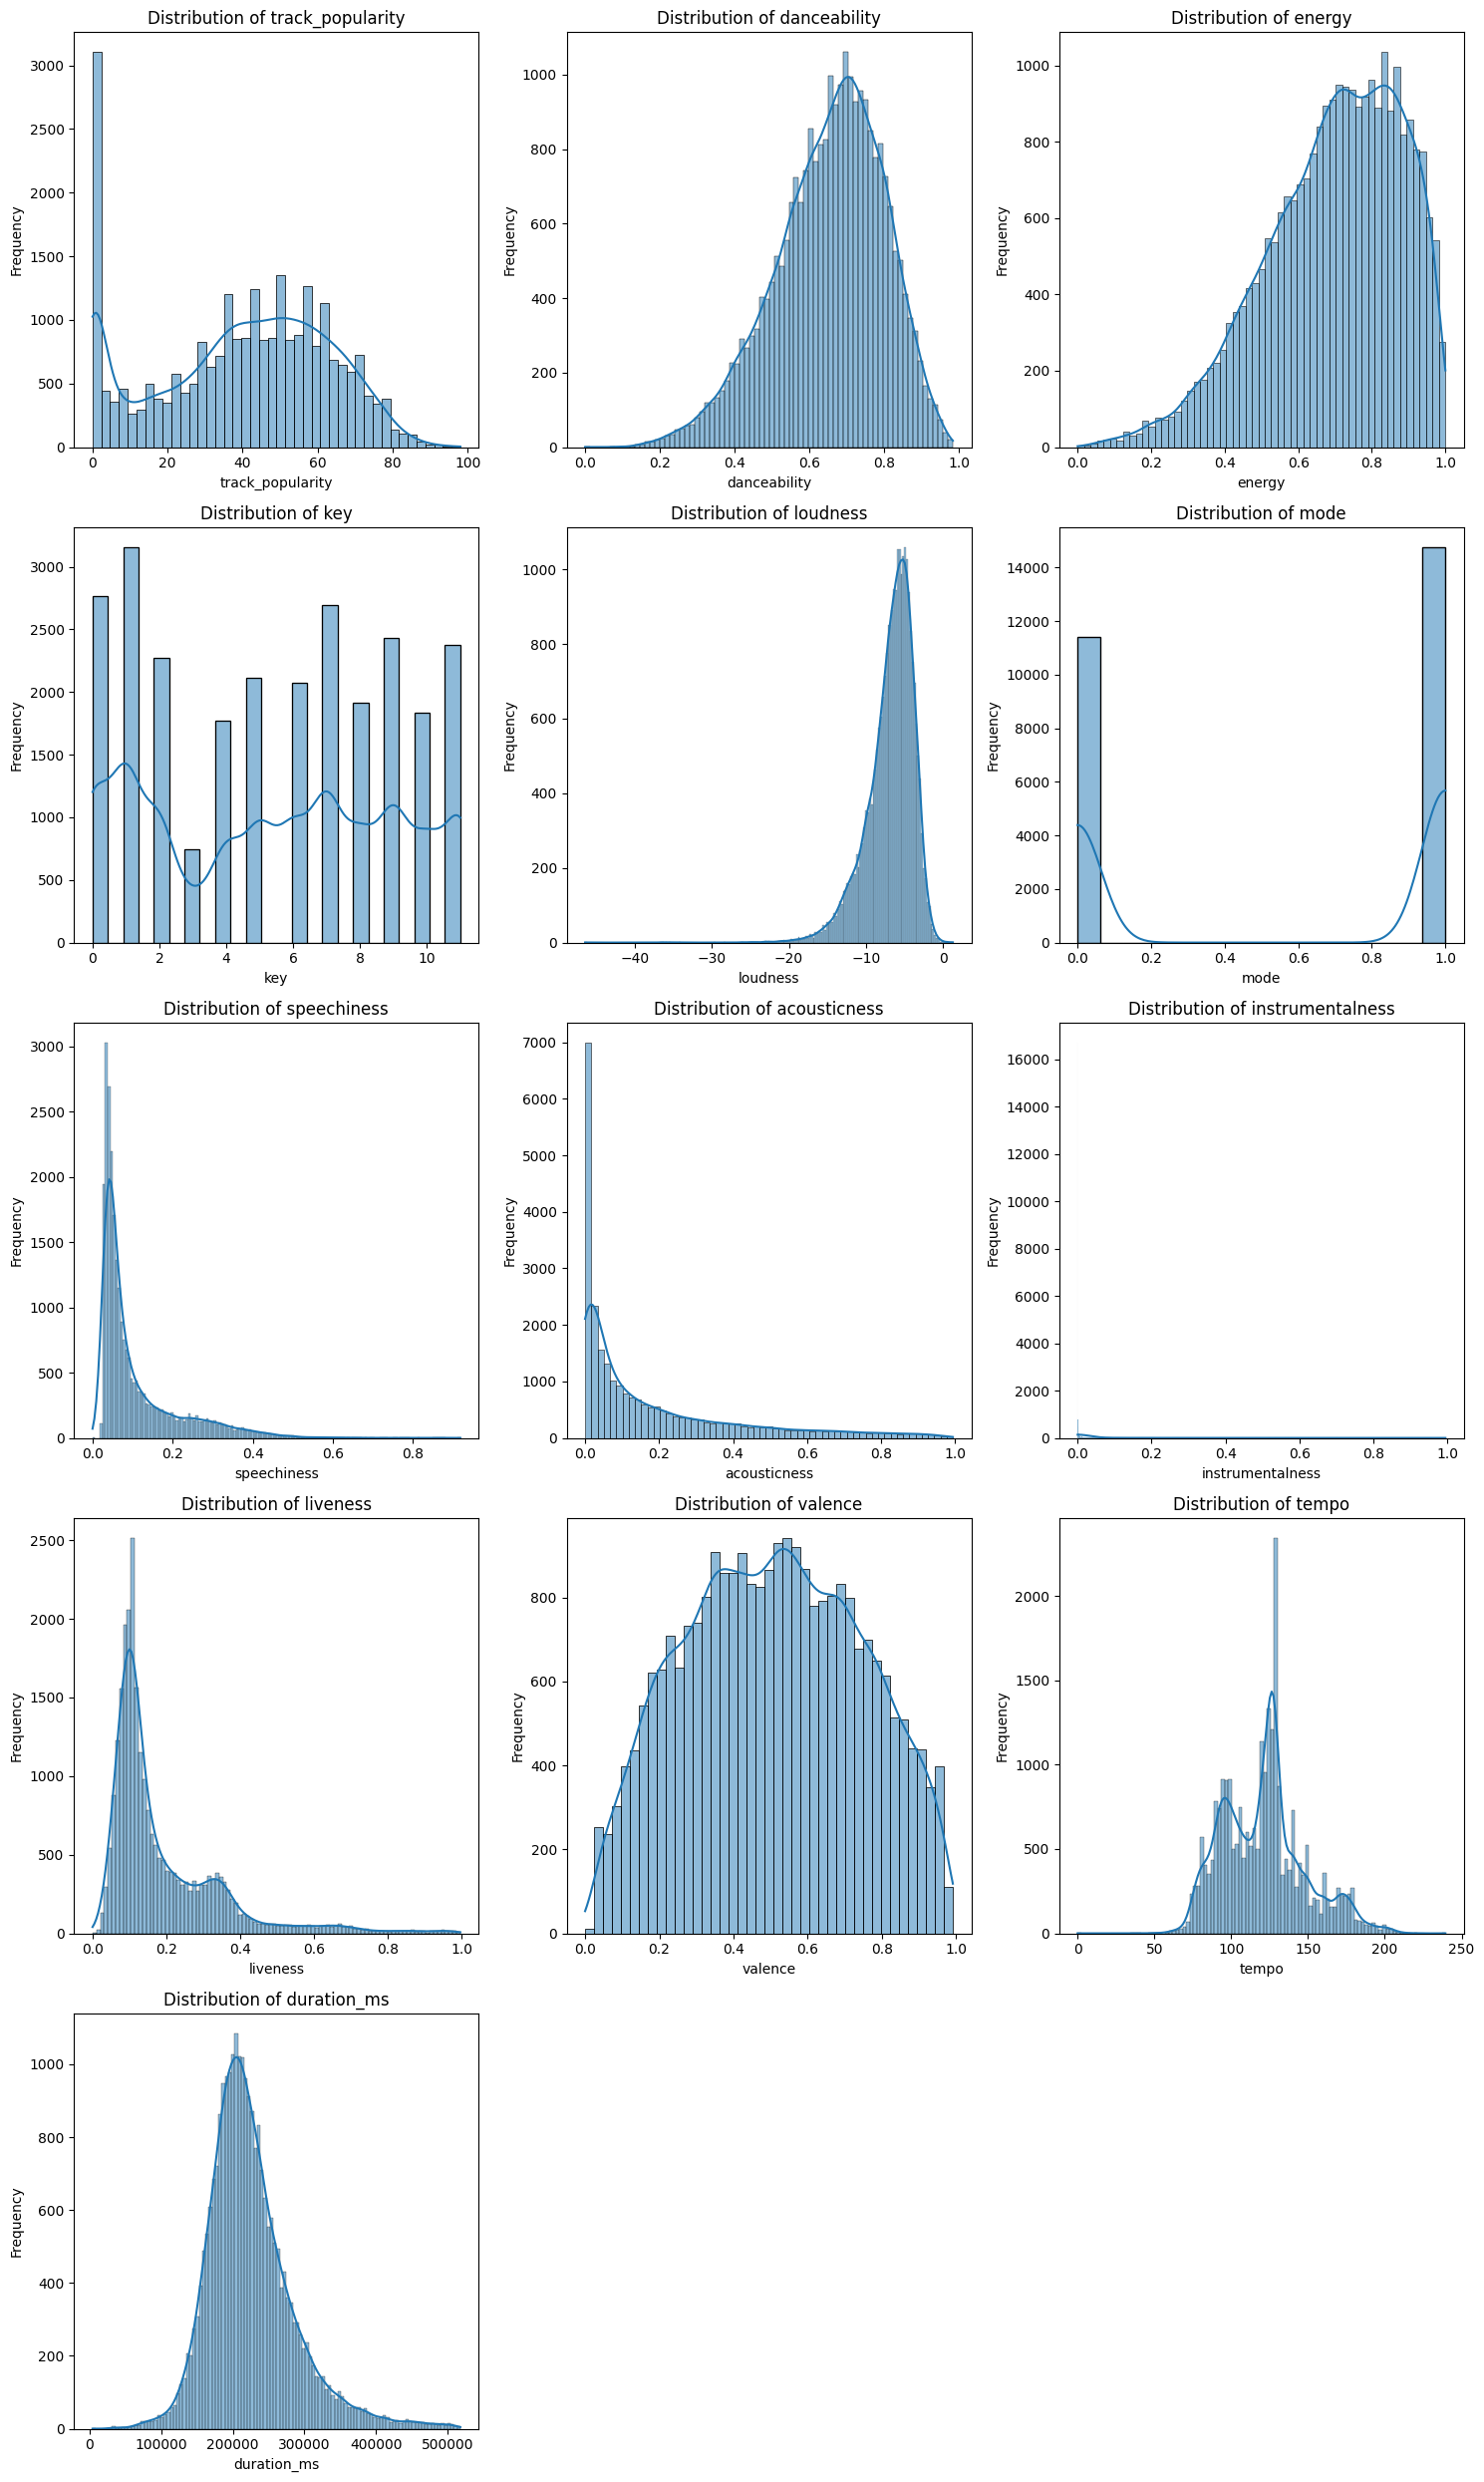

In [230]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Assuming `df` is your DataFrame
numeric_columns = songs.select_dtypes(include=['number']).columns

# Determine the number of rows and columns based on the number of columns to plot
n_cols = 3  # You can adjust this number
n_rows = int(np.ceil(len(numeric_columns) / n_cols))  # Calculate required rows

# Set up the plot
plt.figure(figsize=(15, 5 * n_rows))

# Plot each numeric column
for i, col in enumerate(numeric_columns):
    plt.subplot(n_rows, n_cols, i+1)  # Create subplots based on dynamic row/column count
    sns.histplot(songs[col].dropna(), kde=True)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


### Look at the distribution of genre and subgenre

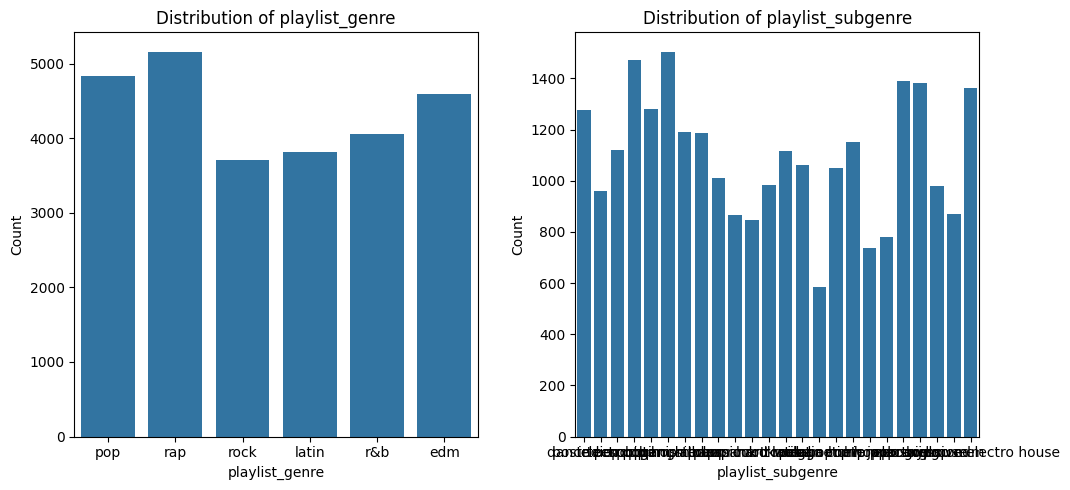

In [231]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Assuming `df` is your DataFrame
drop_cols = ['track_name', 'track_artist', 'track_album_id', 'track_album_name', 'track_album_release_date', 'playlist_id', 'playlist_name', 'track_key']
categorical_columns = songs.select_dtypes(include=['object', 'category']).columns.drop(drop_cols)

# Determine the number of rows and columns based on the number of columns to plot
n_cols = 3  # You can adjust this number
n_rows = int(np.ceil(len(categorical_columns) / n_cols))  # Calculate required rows

# Set up the plot
plt.figure(figsize=(15, 5 * n_rows))

# Plot each categorical column
for i, col in enumerate(categorical_columns):
    plt.subplot(n_rows, n_cols, i+1)  # Create subplots based on dynamic row/column count
    sns.countplot(data=songs, x=col)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')

plt.tight_layout()
plt.show()


In [232]:
songs["playlist_subgenre"].unique()

array(['dance pop', 'post-teen pop', 'electropop', 'indie poptimism',
       'hip hop', 'southern hip hop', 'gangster rap', 'trap',
       'album rock', 'classic rock', 'permanent wave', 'hard rock',
       'tropical', 'latin pop', 'reggaeton', 'latin hip hop',
       'urban contemporary', 'hip pop', 'new jack swing', 'neo soul',
       'electro house', 'big room', 'pop edm',
       'progressive electro house'], dtype=object)

## Playlist dataset

In [233]:
# Read CSV and skip problematic rows
playlists = pd.read_csv("data/spotify_dataset.csv", on_bad_lines='skip')

# Check the first few rows to ensure it loaded correctly
playlists.head()


,user_id,"""artistname""","""trackname""","""playlistname"""
0,9cc0cfd4d7d7885102480dd99e7a90d6,Elvis Costello,(The Angels Wanna Wear My) Red Shoes,HARD ROCK 2010
1,9cc0cfd4d7d7885102480dd99e7a90d6,Elvis Costello & The Attractions,"(What's So Funny 'Bout) Peace, Love And Unders...",HARD ROCK 2010
2,9cc0cfd4d7d7885102480dd99e7a90d6,Tiffany Page,7 Years Too Late,HARD ROCK 2010
3,9cc0cfd4d7d7885102480dd99e7a90d6,Elvis Costello & The Attractions,Accidents Will Happen,HARD ROCK 2010
4,9cc0cfd4d7d7885102480dd99e7a90d6,Elvis Costello,Alison,HARD ROCK 2010


In [234]:
nan_counts = playlists.isna().sum()
print(nan_counts)

user_id                0
 "artistname"      33572
 "trackname"          88
 "playlistname"     1246
dtype: int64


In [235]:
playlists.dropna(inplace=True)

In [236]:
playlists.shape

(12856831, 4)

### fix the column names

In [237]:
# Assuming your DataFrame is named 'songs'
# Remove leading/trailing spaces and quotation marks from column names
playlists.columns = playlists.columns.str.replace('"', '').str.strip()

# Check the updated column names
print(playlists.columns)
print(playlists.shape)


Index(['user_id', 'artistname', 'trackname', 'playlistname'], dtype='object')
(12856831, 4)


In [238]:
playlists["track_key"] = playlists["trackname"].str.lower().str.strip() + " _ " + playlists["artistname"].str.lower().str.strip()
playlists = playlists.drop_duplicates(subset=["track_key"])
playlists.head()

,user_id,artistname,trackname,playlistname,track_key
0,9cc0cfd4d7d7885102480dd99e7a90d6,Elvis Costello,(The Angels Wanna Wear My) Red Shoes,HARD ROCK 2010,(the angels wanna wear my) red shoes _ elvis c...
1,9cc0cfd4d7d7885102480dd99e7a90d6,Elvis Costello & The Attractions,"(What's So Funny 'Bout) Peace, Love And Unders...",HARD ROCK 2010,"(what's so funny 'bout) peace, love and unders..."
2,9cc0cfd4d7d7885102480dd99e7a90d6,Tiffany Page,7 Years Too Late,HARD ROCK 2010,7 years too late _ tiffany page
3,9cc0cfd4d7d7885102480dd99e7a90d6,Elvis Costello & The Attractions,Accidents Will Happen,HARD ROCK 2010,accidents will happen _ elvis costello & the a...
4,9cc0cfd4d7d7885102480dd99e7a90d6,Elvis Costello,Alison,HARD ROCK 2010,alison _ elvis costello


### finally clean the datasets so that the song in one are also in the other

In [239]:
# Standardize column values (lowercase, stripped spaces)
#songs['track_name'] = songs['track_name'].str.lower().str.strip()
#playlists['trackname'] = playlists['trackname'].str.lower().str.strip()
songs.head()

,track_name,track_artist,track_popularity,track_album_id,track_album_name,track_album_release_date,playlist_name,playlist_id,playlist_genre,playlist_subgenre,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,track_key
0,I Don't Care (with Justin Bieber) - Loud Luxur...,Ed Sheeran,66,2oCs0DGTsRO98Gh5ZSl2Cx,I Don't Care (with Justin Bieber) [Loud Luxury...,2019-06-14,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,dance pop,...,-2.634,1,0.0583,0.1020,0.000000,0.0653,0.518,122.036,194754,i don't care (with justin bieber) - loud luxur...
1,Memories - Dillon Francis Remix,Maroon 5,67,63rPSO264uRjW1X5E6cWv6,Memories (Dillon Francis Remix),2019-12-13,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,dance pop,...,-4.969,1,0.0373,0.0724,0.004210,0.3570,0.693,99.972,162600,memories - dillon francis remix _ maroon 5
2,All the Time - Don Diablo Remix,Zara Larsson,70,1HoSmj2eLcsrR0vE9gThr4,All the Time (Don Diablo Remix),2019-07-05,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,dance pop,...,-3.432,0,0.0742,0.0794,0.000023,0.1100,0.613,124.008,176616,all the time - don diablo remix _ zara larsson
3,Call You Mine - Keanu Silva Remix,The Chainsmokers,60,1nqYsOef1yKKuGOVchbsk6,Call You Mine - The Remixes,2019-07-19,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,dance pop,...,-3.778,1,0.1020,0.0287,0.000009,0.2040,0.277,121.956,169093,call you mine - keanu silva remix _ the chains...
4,Someone You Loved - Future Humans Remix,Lewis Capaldi,69,7m7vv9wlQ4i0LFuJiE2zsQ,Someone You Loved (Future Humans Remix),2019-03-05,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,dance pop,...,-4.672,1,0.0359,0.0803,0.000000,0.0833,0.725,123.976,189052,someone you loved - future humans remix _ lewi...


In [240]:
# Step 1: Identify the common artists between both tables
common_artists = songs['track_key'].isin(playlists['track_key'])

# Step 2: Filter both tables to include only the common artists
songs_cleaned = songs[common_artists]
playlists_cleaned = playlists[playlists['track_key'].isin(songs['track_key'])]


### check the shape difference to see what has been dropped

In [241]:
songs.shape

(26159, 23)

In [242]:
songs_cleaned.shape
# songs_cleaned.head()

(8516, 23)

In [243]:
playlists.shape

(2695289, 5)

In [244]:
playlists_cleaned.shape

(8516, 5)

### change the date datetime to be standardized in the future

In [245]:
songs_cleaned["track_album_release_date"] = pd.to_datetime(songs_cleaned["track_album_release_date"], format='mixed')


/var/folders/1n/ybff6dvn5291kmbqn3113gr40000gn/T/ipykernel_65347/2996141781.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  songs_cleaned["track_album_release_date"] = pd.to_datetime(songs_cleaned["track_album_release_date"], format='mixed')


In [246]:
songs_cleaned["track_album_release_date"]

134     2014-10-13
135     2012-01-01
146     2015-05-26
148     2012-01-01
151     2012-01-01
           ...    
32828   2014-04-28
32829   2013-03-08
32830   2014-04-21
32831   2014-01-01
32832   2014-03-03
Name: track_album_release_date, Length: 8516, dtype: datetime64[ns]

In [247]:
songs_cleaned.loc[:,"track_album_release_year"] = songs_cleaned["track_album_release_date"].dt.year
songs_cleaned.loc[:,"track_album_release_month"] = songs_cleaned["track_album_release_date"].dt.month
songs_cleaned.loc[:,"track_album_release_day"] = songs_cleaned["track_album_release_date"].dt.day

/var/folders/1n/ybff6dvn5291kmbqn3113gr40000gn/T/ipykernel_65347/1232799980.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  songs_cleaned.loc[:,"track_album_release_year"] = songs_cleaned["track_album_release_date"].dt.year
/var/folders/1n/ybff6dvn5291kmbqn3113gr40000gn/T/ipykernel_65347/1232799980.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  songs_cleaned.loc[:,"track_album_release_month"] = songs_cleaned["track_album_release_date"].dt.month
/var/folders/1n/ybff6dvn5291kmbqn3113gr40000gn/T/ipyke

In [248]:
songs_cleaned = songs_cleaned.drop("track_album_release_date", axis=1)

### save the cleaned datasets

In [249]:
songs_cleaned.drop(["track_album_id", "playlist_id"], axis=1, inplace=True)

In [250]:
songs_cleaned.to_csv('cleaned_data/songs_cleaned.csv', index=False)
playlists_cleaned.head()

,user_id,artistname,trackname,playlistname,track_key
13,9cc0cfd4d7d7885102480dd99e7a90d6,Crowded House,Don't Dream It's Over,HARD ROCK 2010,don't dream it's over _ crowded house
69,9cc0cfd4d7d7885102480dd99e7a90d6,Pearl Jam,Alive,IOW 2012,alive _ pearl jam
70,9cc0cfd4d7d7885102480dd99e7a90d6,Tom Petty And The Heartbreakers,American Girl,IOW 2012,american girl _ tom petty and the heartbreakers
73,9cc0cfd4d7d7885102480dd99e7a90d6,Pearl Jam,Black,IOW 2012,black _ pearl jam
74,9cc0cfd4d7d7885102480dd99e7a90d6,Bruce Springsteen,Born to Run,IOW 2012,born to run _ bruce springsteen


## Clean playlist songs into matrix factorization formatting

In [251]:
playlists_cleaned = playlists_cleaned.drop(columns=['trackname', 'artistname', 'playlistname'], axis=0)

In [252]:
playlists_cleaned["value"] = 1
playlists_cleaned.shape

(8516, 3)

In [253]:
import scipy.sparse
from pandas.api.types import CategoricalDtype

users = playlists_cleaned["user_id"].unique()
songs = playlists_cleaned["track_key"].unique()
shape = (len(users), len(songs))

user_cat = CategoricalDtype(categories=sorted(users), ordered = True)
song_cat = CategoricalDtype(categories=sorted(songs), ordered = True)
user_ind = playlists_cleaned["user_id"].astype(user_cat).cat.codes
song_ind = playlists_cleaned["track_key"].astype(song_cat).cat.codes

coo = scipy.sparse.coo_matrix((playlists_cleaned["value"], (user_ind, song_ind)), shape = shape)


In [260]:
csr = coo.tocsr()
csr_df = pd.DataFrame(csr.toarray())
csr_df = csr_df.set_axis(songs, axis = 1).set_axis(users, axis=0)
csr_df.shape

#sdf = csr_df.astype(pd.SparseDtype("float", 0))


(1855, 8516)

In [255]:
#sdf2 = sdf.sparse.to_dense()
#sdf2.head()

In [256]:
# If you want to save 'csr_df' as well:
csr_df.to_csv('cleaned_data/csr_df.csv', index=False)

In [257]:
# Checking duplicates for songs_cleaned 

duplicate_names = songs_cleaned.duplicated(subset=['track_name']).sum()
print(f"Number of duplicate names: {duplicate_names}")

duplicate_rows = songs_cleaned.duplicated().sum()
print(f"Number of duplicate rows: {duplicate_rows}")

duplicate_keys = songs_cleaned.duplicated(subset=['track_key']).sum()
print(f"Number of duplicate song keys: {duplicate_keys}")


Number of duplicate names: 409
Number of duplicate rows: 0
Number of duplicate song keys: 0


In [258]:
# Observing the output of the new unique key for songs_cleaned 

#print(songs_cleaned["track_key"].head())  # first five rows 
print(songs_cleaned.head())

                                            track_name track_artist  \
134                 Say My Name (feat. Zyra) - RAC Mix       ODESZA   
135                                            Clarity         Zedd   
146                               Heroes (we could be)       Alesso   
148  Let Me Love You (Until You Learn To Love Yours...        Ne-Yo   
151  Stay The Night - Featuring Hayley Williams Of ...         Zedd   

     track_popularity         track_album_name playlist_name playlist_genre  \
134                47      Say My Name Remixes     Dance Pop            pop   
135                74                  Clarity     Dance Pop            pop   
146                73                  Forever     Dance Pop            pop   
148                69  R.E.D. (Deluxe Edition)     Dance Pop            pop   
151                61         Clarity (Deluxe)     Dance Pop            pop   

    playlist_subgenre  danceability  energy  key  ...  acousticness  \
134         dance pop      